# PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH

In [54]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

# Sử dụng thư viện LinearRegression từ sklearn
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


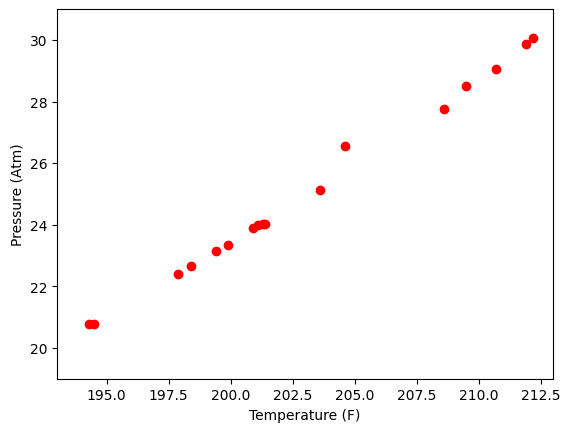

In [ ]:
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


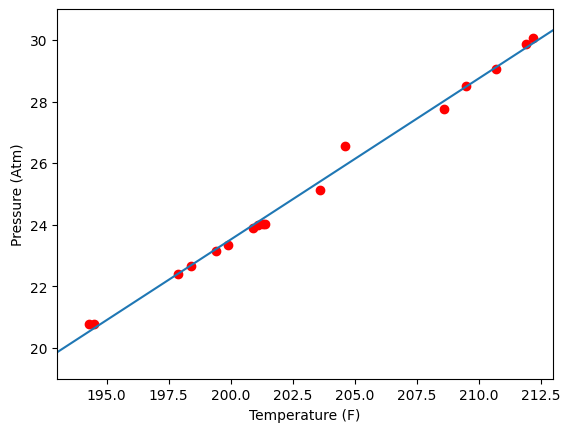

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

## Ví dụ 2

In [ ]:
with open('/content/drive/MyDrive/fuel.txt') as f:
  lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
  splitted = line.replace('\n', '').split(',')
  splitted.pop(0)
  splitted = list(map(float, splitted))
  fuel = 1000 * splitted[1] / splitted[5]
  dlic = 1000 * splitted[0] / splitted[5]
  logMiles = math.log2(splitted[3])
  y_data.append([fuel])
  x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

### Trường hợp sử dụng Numpy

In [ ]:
def qr_householder(A):
  #""" Compute QR decomposition of A using Householder reflection"""
  M = A.shape[0]
  N = A.shape[1]

  # set Q to the identity matrix
  Q = np.identity(M)

  # set R to zero matrix
  R = np.copy(A)

  for n in range(N):
    # vector to transform
    x = A[n:, n]
    k = x.shape[0]

    # compute ro=-sign(x0)||x||
    ro = -np.sign(x[0]) * np.linalg.norm(x)

    # compute the householder vector v
    e = np.zeros(k)
    e[0] = 1
    v = (1 / (x[0] - ro)) * (x - (ro * e))

    # apply v to each column of A to find R
  for i in range(N):
    R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

  # apply v to each column of Q
  for i in range(M):
    Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

  return Q.transpose(), R

In [ ]:
def linear_regression(x_data, y_data):
# """
# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
# """
  # add column 1
  x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

  Q, R = qr_householder(x_bars) # QR decomposition
  R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
  A = np.dot(R_pinv, Q.T) # apply formula

  return np.dot(A, y_data)

In [ ]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
  print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457733883
                 Tax: -4.227983208329623
                Dlic: 0.471871213441981
              Income: -0.006135330970417689
            LogMiles: 18.545274506048003


### Trường hợp sử dụng thư viện Scikit-Learn

In [ ]:
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

LinearRegression(fit_intercept=False)

## Ví dụ 3

In [ ]:
# Change to data path on your computer
data = pd.read_csv("/content/drive/MyDrive/SAT_GPA.csv")

# Show the description of data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


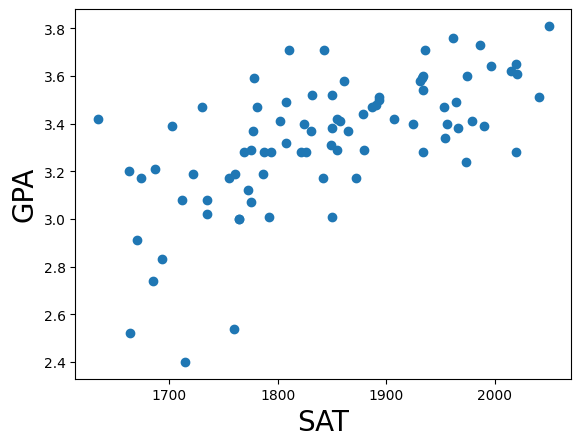

In [ ]:
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [ ]:
# Chia dữ liệu thành training (60 mẫu) và validation (24 mẫu)
x_train, y_train = x[:60], y[:60]
x_val, y_val = x[60:], y[60:]

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
# Thêm cột x_0 = 1 cho dữ liệu training và validation
x_train_bias = np.hstack([np.ones(60).reshape(60,1), x_train.reshape(60,1)])
x_val_bias = np.hstack([np.ones(24).reshape(24,1), x_val.reshape(24,1)])

# Tạo mô hình hồi quy tuyến tính
model1 = LinearRegression()

# Huấn luyện mô hình với dữ liệu training
model1.fit(x_train_bias, y_train)

# Hệ số a và b của đường hồi quy
a = model1.intercept_
b = model1.coef_[0]

# In công thức hồi quy tuyến tính
print(f"Công thức hồi quy tuyến tính: GPA = {a:.3f} + {b:.3f} * SAT")

Công thức hồi quy tuyến tính: GPA = 0.889 + 0.000 * SAT


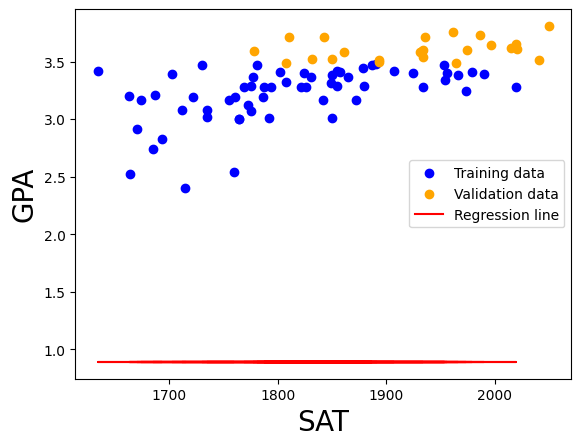

In [ ]:
# Vẽ đường hồi quy
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_val, y_val, color='orange', label='Validation data')
plt.plot(x_train, a + b * x_train, color='red', label='Regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# Dự đoán điểm GPA cho dữ liệu validation
y_pred_val = model1.predict(x_val_bias)

# Tính tổng bình phương sai số
mse_val = np.mean((y_pred_val - y_val)**2)

# In ra giá trị mse_val
print(f"Tổng bình phương sai số trên dữ liệu validation: {mse_val:.3f}")


Tổng bình phương sai số trên dữ liệu validation: 0.070


## Ví dụ 4

In [56]:
data = pd.read_csv("/content/drive/MyDrive/vidu3_lin_reg.txt", sep=" ", header=None)

# Bỏ qua cột thứ nhất
data = data.iloc[1:, 1:]

data

,1,2,3,4,5,6
1,56,21,160,14.0,6.00,1.95
2,76,18,150,12.0,4.97,1.33
3,63,16,160,4.4,6.39,.83
4,78,20,100,4.0,7.00,2.00
5,87,20,110,4.6,4.10,1.30
...,...,...,...,...,...,...
96,55,24,160,5.0,7.20,.90
97,76,15,140,3.1,5.24,1.16
98,70,25,180,4.0,4.40,1.00
99,85,21,160,5.2,5.20,.97


In [57]:
# Split the data into training and testing sets
X_train = data.iloc[:80, :-1]
y_train = data.iloc[:80, -1]
X_test = data.iloc[80:, :-1]
y_test = data.iloc[80:, -1]

# In ra kích thước của tập training và tập validation
print("Kích thước tập training:", X_train.shape)
print("Kích thước tập validation:", X_test.shape)

Kích thước tập training: (80, 5)
Kích thước tập validation: (20, 5)


In [61]:
# Tạo mô hình hồi quy tuyến tính
model2 = LinearRegression()

# Huấn luyện mô hình
model2.fit(X_train, y_train)

y_pred =  model2.predict(X_test)

y_pred = y_pred.astype(float)
y_test = y_test.astype(float)

errors = np.mean((y_pred - y_test)**2)

print("Predicted NTM thickness:", y_pred[0])
print("Errors:", errors)
print("Mean errors:", errors.mean())
print("Variance of error:", errors.var())

Predicted NTM thickness: 0.9101227212902687
Errors: 0.22740099167615901
Mean errors: 0.22740099167615901
Variance of error: 0.0


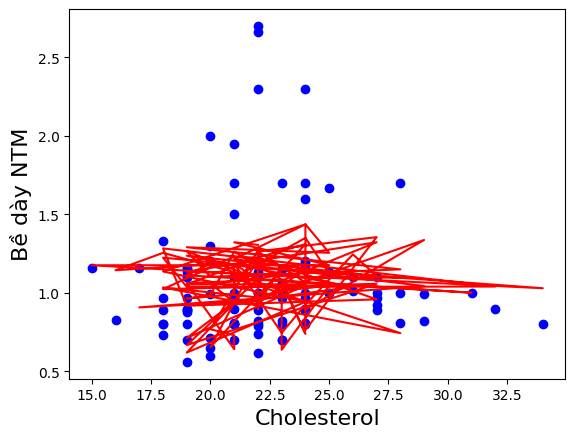

In [ ]:
plt.scatter(X[:, 2], y, color='blue')
plt.plot(X[:, 2], model2.predict(X), color='red')
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Bề dày NTM', fontsize=16)
plt.show()

## Ví dụ 5

In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv("/content/drive/MyDrive/real_estate.csv")

# Bỏ qua cột thứ nhất
data = data.drop(data.columns[0], axis=1)

# Chia dữ liệu thành tập training và tập validation
X_train = data.iloc[:350, 1:7]
y_train = data.iloc[:350, -1]
X_val = data.iloc[350:, 1:7]
y_val = data.iloc[350:, -1]

# In ra kích thước của tập training và tập validation
print("Kích thước tập training:", X_train.shape)
print("Kích thước tập validation:", X_val.shape)

Kích thước tập training: (350, 6)
Kích thước tập validation: (64, 6)


In [ ]:
# Thêm cột x_0 = 1
x_bias_train = np.ones((X_train.shape[0], 1))
x_bias_val = np.ones((X_val.shape[0], 1))

# Chuyển đổi dữ liệu sang NumPy array
X_train = np.hstack([x_bias_train, X_train.to_numpy()])
X_val = np.hstack([x_bias_val, X_val.to_numpy()])

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
# Tạo mô hình hồi quy tuyến tính
model3 = LinearRegression()

# Huấn luyện mô hình
model3.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Dự đoán giá nhà cho tập validation
y_pred = model3.predict(X_val)

# Tính tổng bình phương sai số
mse = np.mean((y_pred - y_val)**2)

# In ra tổng bình phương sai số
print("Tổng bình phương sai số:", mse)

Tổng bình phương sai số: 2.1092168453346803e-28
